# Chapter 7 Neural networks
## 7.4 Code samples and comments for vanilla MLP
### 7.4.1 Regresion example

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from plot_keras_history import show_history, plot_history
import tensorflow as tf
from tensorflow import keras
from keras import initializers, Input, layers
from keras.constraints import non_neg
from keras.utils import to_categorical

In [2]:
# Load data
DATA_PATH = "../data/raw/data_ml.csv"
data_ml = pd.read_csv(DATA_PATH)
data_ml['date'] = pd.to_datetime(data_ml['date'])
data_ml['R1M_Usd_C'] = (data_ml['R1M_Usd'] > 0).astype(int) # can be useful for classification tasks
data_ml

,stock_id,date,Advt_12M_Usd,Advt_3M_Usd,Advt_6M_Usd,Asset_Turnover,Bb_Yld,Bv,Capex_Ps_Cf,Capex_Sales,...,Total_Debt,Total_Debt_Capital,Total_Liabilities_Total_Assets,Vol1Y_Usd,Vol3Y_Usd,R1M_Usd,R3M_Usd,R6M_Usd,R12M_Usd,R1M_Usd_C
0,13,2006-12-31,0.25,0.33,0.27,0.22,0.33,0.01,0.13,0.84,...,0.27,1.00,0.92,0.84,0.88,0.089,0.104,0.344,-0.041,1
1,13,2007-01-31,0.25,0.32,0.28,0.22,0.40,0.01,0.13,0.84,...,0.27,1.00,0.92,0.84,0.88,0.039,0.091,-0.011,-0.253,1
2,13,2007-02-28,0.26,0.30,0.30,0.22,0.15,0.01,0.13,0.84,...,0.27,1.00,0.92,0.87,0.88,-0.012,0.101,0.118,-0.366,0
3,17,2015-03-31,0.73,0.64,0.70,0.40,0.47,0.01,0.70,0.74,...,0.75,1.00,1.00,1.00,0.99,0.174,-0.144,-0.518,-0.376,1
4,17,2015-04-30,0.72,0.62,0.66,0.40,0.46,0.01,0.70,0.74,...,0.75,1.00,1.00,1.00,0.99,-0.106,-0.576,-0.535,-0.113,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283375,1205,2004-05-31,0.97,0.97,0.98,0.19,0.74,1.00,0.54,0.90,...,0.99,0.57,0.59,0.34,0.63,-0.029,-0.027,0.038,0.112,0
283376,1205,2004-07-31,0.97,0.96,0.98,0.19,0.75,1.00,0.53,0.90,...,0.99,0.58,0.60,0.29,0.64,0.028,0.077,0.175,0.122,1
283377,1205,2004-08-31,0.97,0.96,0.97,0.19,0.75,1.00,0.53,0.90,...,0.99,0.58,0.60,0.27,0.64,0.011,0.076,0.152,0.091,1
283378,1205,2004-09-30,0.97,0.96,0.97,0.18,0.93,1.00,0.52,0.90,...,0.99,0.57,0.60,0.26,0.66,0.045,0.178,0.196,0.040,1


In [3]:
X = data_ml.iloc[:,3:95]
y = data_ml['R1M_Usd']

features = X.columns.values.tolist()

separation_date = pd.to_datetime('2013-01-01')

training_sample = data_ml.loc[data_ml['date'] < separation_date]
testing_sample = data_ml.loc[data_ml['date'] > separation_date]

In [4]:
NN_train_features = training_sample[features].values   # Training features
NN_train_labels = training_sample['R1M_Usd'].values    # Training labels
NN_test_features = testing_sample[features].values  # Testing features
NN_test_labels = testing_sample['R1M_Usd'].values   # Testing labels

In [5]:
input_dimension = len(features)

model = keras.Sequential([
    # Input layer
    Input(shape=(input_dimension,)), 
    
    # Dense layers
    layers.Dense(16, activation="relu"),  
    layers.Dense(8, activation="tanh"),
    layers.Dense(1)
])

In [6]:
model.compile(optimizer='RMSprop', 
              loss='mse', 
              metrics=['MeanAbsoluteError'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │         1,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,633 (6.38 KB)

 Trainable params: 1,633 (6.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
769/769 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - MeanAbsoluteError: 0.0923 - loss: 0.0324 - val_MeanAbsoluteError: 0.0657 - val_loss: 0.0341
Epoch 2/10
769/769 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - MeanAbsoluteError: 0.0923 - loss: 0.0324 - val_MeanAbsoluteError: 0.0657 - val_loss: 0.0341
Epoch 2/10
769/769 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - MeanAbsoluteError: 0.0870 - loss: 0.0305 - val_MeanAbsoluteError: 0.0660 - val_loss: 0.0342
Epoch 3/10
769/769 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - MeanAbsoluteError: 0.0870 - loss: 0.0305 - val_MeanAbsoluteError: 0.0660 - val_loss: 0.0342
Epoch 3/10
769/769 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - MeanAbsoluteError: 0.0870 - loss: 0.0305 - val_MeanAbsoluteError: 0.0661 - val_loss: 0.0342
Epoch 4/10
769/769 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - MeanAbsoluteError: 0.0870 - loss: 0.0305 - val_MeanAbsoluteError: 0.0661 - val_loss: 0.0342
Epoch 4/10
769/769 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - MeanAbsoluteError: 0.0870 - loss: 0.0304 - val_MeanAbsoluteError: 0.06

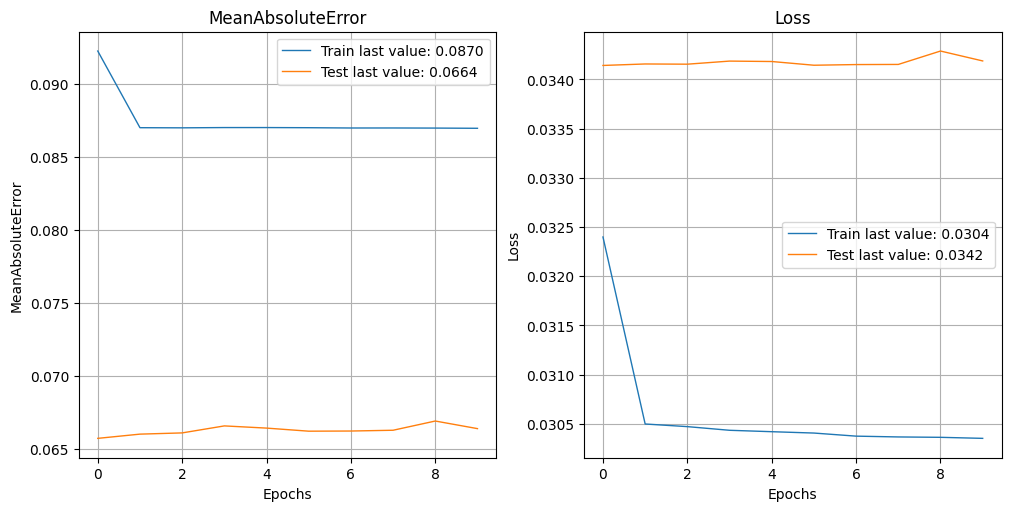

In [7]:
fit_NN = model.fit(
            NN_train_features,
            NN_train_labels,
            batch_size=256,
            epochs = 10,
            validation_data=(NN_test_features,NN_test_labels),
            verbose = True
)
show_history(fit_NN)

In [8]:
preds = model.predict(NN_test_features, batch_size=1024, verbose=0)
hitratio = np.mean((preds.flatten() * NN_test_labels) > 0)
print(f'Hit Ratio: {hitratio}')

Hit Ratio: 0.547750017334227


### 7.4.2 Classification example

In [9]:
NN_train_labels_C = to_categorical(training_sample['R1M_Usd_C'].values) # One-hot encoding of the label
NN_test_labels_C = to_categorical(testing_sample['R1M_Usd_C'].values) # One-hot encoding of the label

In [10]:
input_dimension = len(features)
initializer =initializers.RandomNormal()

model_C = keras.Sequential([
    Input(shape=(input_dimension,)),
    layers.Dense(16, activation="tanh", kernel_initializer=initializer, kernel_constraint = non_neg()),
    layers.Dropout(.25),
    layers.Dense(8, activation="elu", bias_initializer = initializers.Constant(0.2), kernel_regularizer='l2'),
    layers.Dense(2,activation='softmax')            
]) 

In [11]:
model_C.compile(   # Model specification
        optimizer=keras.optimizers.Adam(
                learning_rate=0.01,  # Optimisation method (weight updating)
                beta_1 = 0.9, # The exponential decay rate for the 1st moment estimates
                beta_2 = 0.95), # The exponential decay rate for the 2nd moment estimates
              loss=keras.losses.BinaryCrossentropy(from_logits=True),   # Loss function
              metrics=['categorical_accuracy'])  # Output metric
model_C.summary() # Model structure

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │         1,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,642 (6.41 KB)

 Trainable params: 1,642 (6.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


d:\Code\ml-for-factor-investing\.venv\Lib\site-packages\keras\src\backend\tensorflow\nn.py:789: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


385/385 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - categorical_accuracy: 0.5472 - loss: 0.6969 - val_categorical_accuracy: 0.5587 - val_loss: 0.6864
Epoch 2/20
385/385 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - categorical_accuracy: 0.5472 - loss: 0.6969 - val_categorical_accuracy: 0.5587 - val_loss: 0.6864
Epoch 2/20
385/385 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - categorical_accuracy: 0.5499 - loss: 0.6884 - val_categorical_accuracy: 0.5587 - val_loss: 0.6864
Epoch 3/20
385/385 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - categorical_accuracy: 0.5499 - loss: 0.6884 - val_categorical_accuracy: 0.5587 - val_loss: 0.6864
Epoch 3/20
385/385 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - categorical_accuracy: 0.5499 - loss: 0.6883 - val_categorical_accuracy: 0.5587 - val_loss: 0.6863
Epoch 4/20
385/385 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - categorical_accuracy: 0.5499 - loss: 0.6883 - val_categorical_accuracy: 0.5587 - val_loss: 0.6863
Epoch 4/20
385/385 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - categorical_accuracy: 0.5499 - loss: 0.6884 -

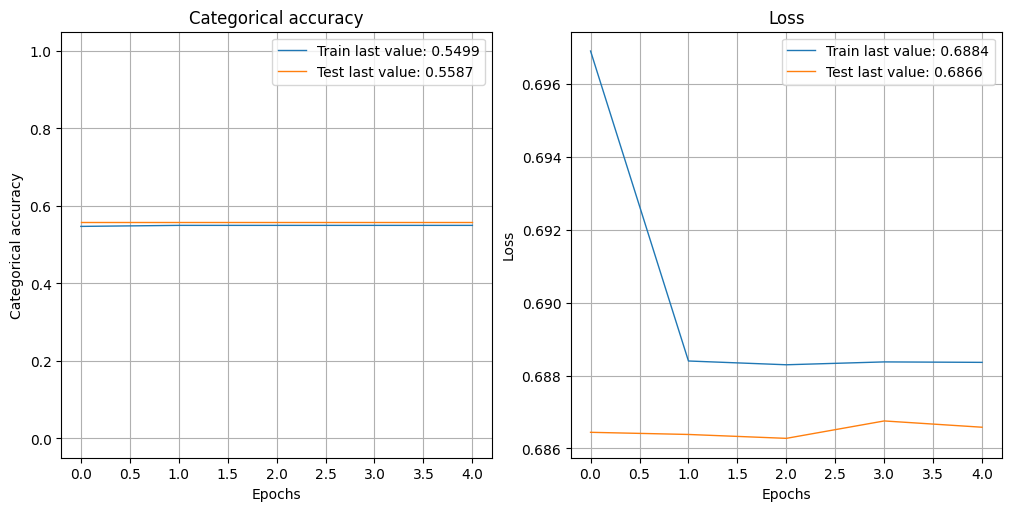

In [12]:
callback = tf.keras.callbacks.EarlyStopping(monitor = "val_loss",    # Early stopping:
                                min_delta = 0.001,       # Improvement threshold
                                patience = 4,            # Nb epochs with no improvmt 
                                verbose = 0 )            # No warnings

fit_NN_C = model_C.fit(
            NN_train_features, # Training features
            NN_train_labels_C, # Training labels
            batch_size=512, # Training parameters
            epochs = 20,  # Training parameters
            validation_data=(NN_test_features,NN_test_labels_C), # Test data
            verbose = True, # No comments from algo
            callbacks=[callback] # see callback above
            )
show_history(fit_NN_C)

### 7.4.3 Custom losses

In [13]:
model_custom = keras.Sequential([
    Input(shape=(input_dimension,)),
    layers.Dense(16, activation="relu"),
    layers.Dense(8, activation="sigmoid"),
    layers.Dense(1)
])

In [14]:
def custom_loss(y_true, y_pred): # Defines the loss, we use gamma = 5
  loss = tf.reduce_mean(tf.square(y_pred - tf.reduce_mean(y_pred))) - 5 * tf.reduce_mean(
          (y_true - tf.reduce_mean(y_true))*(y_pred - tf.reduce_mean(y_pred)))
  return loss

model_custom.compile( # Model specification
              optimizer='RMSprop',  # Optim method
              loss=custom_loss, # New loss function
              metrics=['MeanAbsoluteError'])

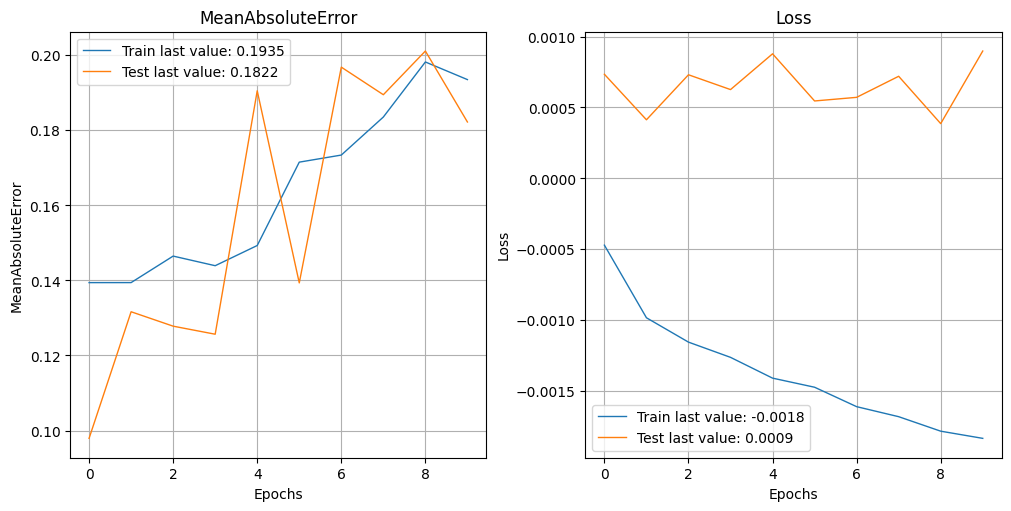

In [15]:
fit_NN_cust = model_custom.fit(
            NN_train_features, # training features
            NN_train_labels, # Training labels
            batch_size=512, epochs = 10, # Training parameters
            validation_data=(NN_test_features,NN_test_labels), # Test data
            verbose = False) # No warnings

show_history(fit_NN_cust)

In [16]:
preds = model_custom.predict(NN_test_features)
hitratio = np.mean((preds.flatten() * NN_test_labels) > 0)
print(f'Hit Ratio: {hitratio}')

2705/2705 ━━━━━━━━━━━━━━━━━━━━ 2s 850us/step
2705/2705 ━━━━━━━━━━━━━━━━━━━━ 2s 850us/step
Hit Ratio: 0.5587168049552776
Hit Ratio: 0.5587168049552776


## 7.5 Recurrent networks
### 7.5.2 Code and results

In [17]:
nb_stocks = 100
stock_ids_short = data_ml['stock_id'].unique()[:nb_stocks]

data_rnn = data_ml[data_ml['stock_id'].isin(stock_ids_short)] # Dedicated dataset
training_sample_rnn = data_rnn[data_rnn['date'] < separation_date] # Training set
testing_sample_rnn = data_rnn[data_rnn['date'] > separation_date] # Test set

nb_feats = len(features) # Nb features
nb_dates_train = training_sample_rnn.shape[0] // nb_stocks # Nb training dates
nb_dates_test = testing_sample_rnn.shape[0] // nb_stocks # Nb testing dates

nn_train_features = training_sample_rnn[features].values # Train features in array format
nn_test_features = testing_sample_rnn[features].values # Test features in array format
nn_train_labels = training_sample_rnn['R1M_Usd'].values # Train label in array format
nn_test_labels = testing_sample_rnn['R1M_Usd'].values # Test label in array format

In [18]:
# Ensure shapes align for reshape: trim any leftover rows so length is divisible by nb_stocks
n_train_rows = nn_train_features.shape[0]
nb_dates_train = n_train_rows // nb_stocks
usable_train = nb_stocks * nb_dates_train
nn_train_features = nn_train_features[:usable_train]
nn_train_labels = nn_train_labels[:usable_train]

n_test_rows = nn_test_features.shape[0]
nb_dates_test = n_test_rows // nb_stocks
usable_test = nb_stocks * nb_dates_test
nn_test_features = nn_test_features[:usable_test]
nn_test_labels = nn_test_labels[:usable_test]

# Reshape into (stock, date, feature)
train_features_rnn = np.reshape(nn_train_features, (nb_stocks, nb_dates_train, nb_feats))
test_features_rnn = np.reshape(nn_test_features, (nb_stocks, nb_dates_test, nb_feats))
train_labels_rnn = np.reshape(nn_train_labels, (nb_stocks, nb_dates_train, 1))
test_labels_rnn = np.reshape(nn_test_labels, (nb_stocks, nb_dates_test, 1))

In [19]:
model_RNN = keras.Sequential([
    Input(shape=(nb_dates_train, nb_feats)),
    layers.GRU(16, activation='tanh', return_sequences=True),
    layers.Dense(1)
])
model_RNN.compile(
    optimizer='RMSprop',
    loss='mse',
    metrics=['MeanAbsoluteError']
)

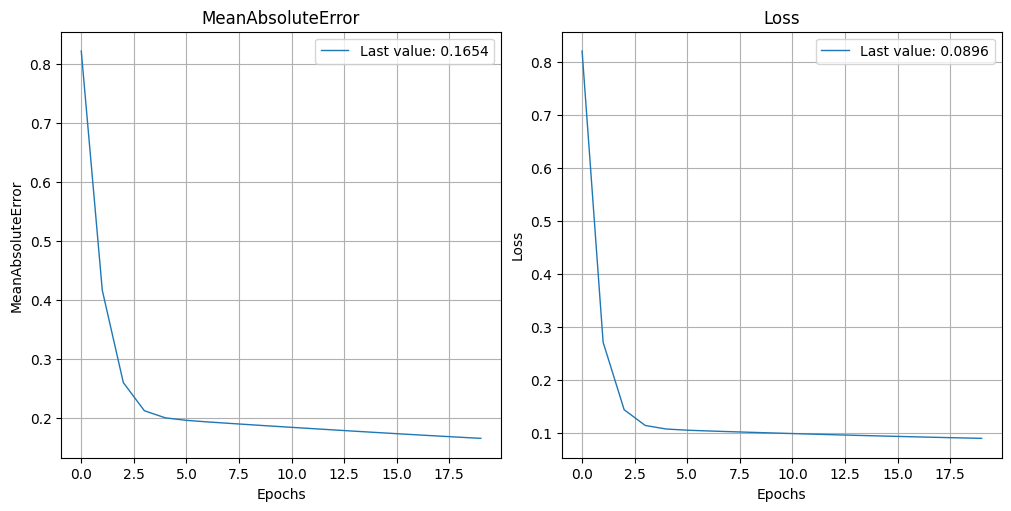

In [20]:
fit_RNN = model_RNN.fit(train_features_rnn, # Training features
                        train_labels_rnn, # Training labels
                        epochs = 20, # Number of rounds
                        batch_size = nb_stocks, # Length of sequences
                        verbose=False) # No warnings
show_history(fit_RNN)

In [21]:
# Rebuild a model with the same architecture as model_RNN to reuse weights
new_model = keras.Sequential([
    Input(shape=(nb_dates_train, nb_feats)),
    layers.GRU(16, activation='tanh', return_sequences=True),
    layers.Dense(1)
])

# Copy weights from the trained model
new_model.set_weights(model_RNN.get_weights())

In [22]:
pred_rnn = new_model.predict(test_features_rnn, batch_size = nb_stocks) # Predictions
hitratio = np.mean(np.multiply(pred_rnn,test_labels_rnn) > 0) # Hit ratio
print(f'Hit Ratio: {hitratio}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
Hit Ratio: 0.4977464788732394
Hit Ratio: 0.4977464788732394


## 7.7 Coding exercices
The purpose of the exercise is to code the autoencoder model described in Gu, Kelly, and Xiu (2020a) (see Section 7.6.2). When coding NNs, the dimensions must be rigorously reported. This is why we reproduce a diagram of the model in Figure 7.13 which clearly shows the inputs and outputs along with their dimensions.

$$r_{t,i} = NN_{beta}(x_{t-1,i}) \cdot NN_{factor}(r_t) + e_{t,i}$$

* **$NN_{beta}$:** Learns asset-specific **factor exposures ($\beta$)** as a function of **lagged firm characteristics** ($x_{t-1,i}$).
* **$NN_{factor}$:** Learns potentially **non-linear factors ($f$)** from **current returns** ($r_t$).

The model's complexity stems from using **two separate NNs** to determine the components ($\beta$ and $f$).


Building combined GKY autoencoder model...


Model: "functional_65"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Characteristics_In… │ (None, 92)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Returns_Input       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Beta_Network        │ (None, 1)         │      1,633 │ Characteristics_… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Factor_Network      │ (None, 1)         │         57 │ Returns_Input[0]… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Predicted_Return    │ (None, 1)         │          0 │ Beta_Network[0][… │
│ (Multiply)          │                   │            │ Factor_Network[0… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,690 (6.60 KB)

 Trainable params: 1,690 (6.60 KB)

 Non-trainable params: 0 (0.00 B)


Training combined autoencoder (end-to-end)...


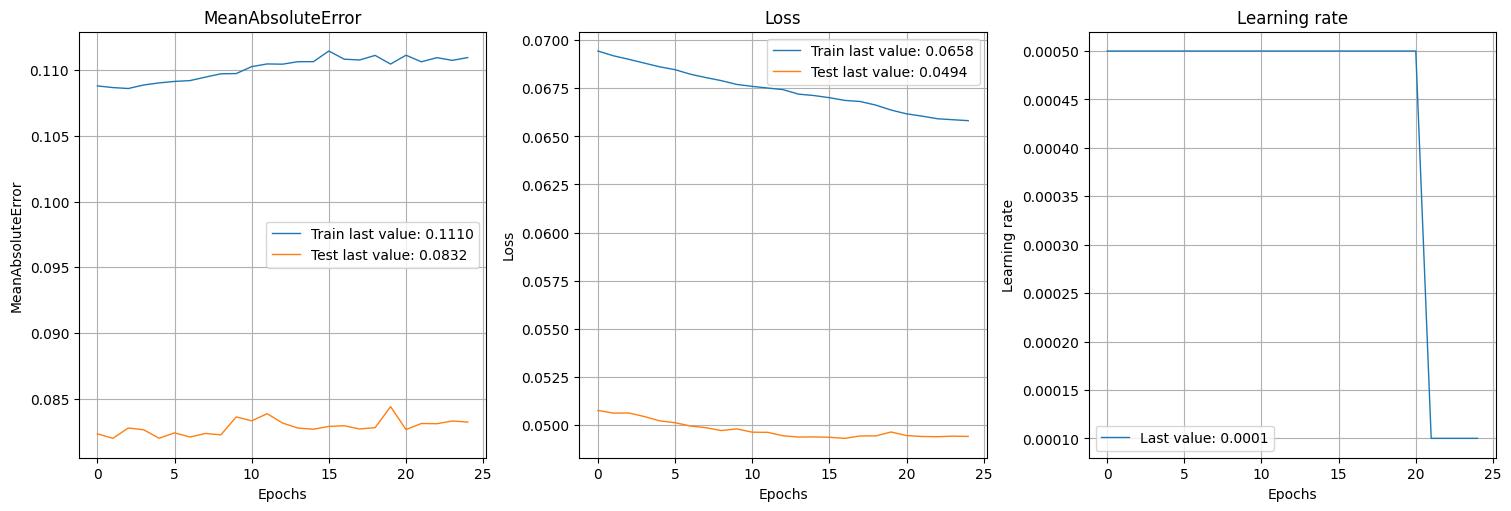


Evaluating combined autoencoder on test set...
Combined Model MSE (test): 0.049307
Combined Model Hit Ratio (test): 0.5276
Combined Model MSE (test): 0.049307
Combined Model Hit Ratio (test): 0.5276


In [44]:
# Get dimensions from the assumed data structures
actual_nb_dates_train = train_features_rnn.shape[1]
actual_nb_dates_test = test_features_rnn.shape[1]
actual_nb_feats = train_features_rnn.shape[2]

# --- 1. Data Flattening and Factor Input Preparation ---

# Flatten features and labels for stock-date observations
X_train_flat = train_features_rnn.reshape(-1, actual_nb_feats)  # (nb_obs_train, features)
y_train_flat = train_labels_rnn.reshape(-1)                    # (nb_obs_train,)
X_test_flat = test_features_rnn.reshape(-1, actual_nb_feats)
y_test_flat = test_labels_rnn.reshape(-1)

# Calculate the input for NN_factor: Average returns per date (r_t)
# Reshape to (dates, 1) for Keras Input(shape=(1,))
returns_train_flat = np.mean(train_labels_rnn, axis=0).reshape(-1, 1)  # (nb_dates_train, 1)
returns_test_flat = np.mean(test_labels_rnn, axis=0).reshape(-1, 1)    # (nb_dates_test, 1)

# Expand the average returns to match the flattened (stock, date) observations
# The average return r_t needs to be repeated for every stock at that date t
stock_date_indices = np.arange(len(y_train_flat)) % actual_nb_dates_train
returns_train_expanded = returns_train_flat[stock_date_indices] # (nb_obs_train, 1)

stock_date_indices_test = np.arange(len(y_test_flat)) % actual_nb_dates_test
returns_test_expanded = returns_test_flat[stock_date_indices_test] # (nb_obs_test, 1)


# --- 2. Define the Neural Networks (Sub-Models) ---

# NN_beta: Characteristics -> Beta (Factor Exposure)
# Input: (batch, actual_nb_feats) | Output: (batch, 1)
def build_nn_beta(input_shape):
    model = keras.Sequential([
        Input(shape=input_shape),
        layers.Dense(16, activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(1, name='beta_output') # Output: beta for each observation
    ])
    return model

# NN_factor: Average Return -> Factor (Common Factor)
# Input: (batch, 1) | Output: (batch, 1)
def build_nn_factor(input_shape):
    model = keras.Sequential([
        Input(shape=input_shape),
        layers.Dense(8, activation='relu'),
        layers.Dense(4, activation='relu'),
        layers.Dense(1, name='factor_output') # Output: factor value
    ])
    return model

NN_beta = build_nn_beta((actual_nb_feats,))
NN_beta.name = "Beta_Network"
NN_factor = build_nn_factor((1,))
NN_factor.name = "Factor_Network"


# --- 3. Build the Combined Autoencoder Model (Functional API) ---
print("\nBuilding combined GKY autoencoder model...")
# 

# Define two inputs
characteristics_input = Input(shape=(actual_nb_feats,), name='Characteristics_Input') # x_t-1,i
returns_input = Input(shape=(1,), name='Returns_Input')                             # r_t (expanded)

# Pass inputs through the respective networks
beta_output = NN_beta(characteristics_input)   # Output: beta (batch, 1)
factor_output = NN_factor(returns_input)       # Output: factor (batch, 1)

# CRITICAL STEP: Combine using Multiplication (beta * factor)
combined_output = layers.Multiply(name='Predicted_Return')(
    [beta_output, factor_output]
)

# Create the final Model
model_autoencoder_gky = keras.Model(
    inputs=[characteristics_input, returns_input],
    outputs=combined_output
)

model_autoencoder_gky.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005), # Use explicit learning rate
    loss='mse',
    metrics=['MeanAbsoluteError']
)

model_autoencoder_gky.summary()


# --- 4. Train the Combined Model (End-to-End) ---
print("\nTraining combined autoencoder (end-to-end)...")
fit_autoencoder = model_autoencoder_gky.fit(
    [X_train_flat, returns_train_expanded], # Input: [Characteristics, Expanded Returns]
    y_train_flat,                           # Target: r_t,i
    epochs=50,
    batch_size=256,
    validation_data=([X_test_flat, returns_test_expanded], y_test_flat),
    verbose=False,
    callbacks=[
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=8,           # Give it a bit more room
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss', 
        factor=0.2,           # Cut learning rate by 80%
        patience=4,           # If no improvement after 4 epochs
        min_lr=1e-6
    )
]
)
show_history(fit_autoencoder)


# --- 5. Evaluate ---
print("\nEvaluating combined autoencoder on test set...")
metrics = model_autoencoder_gky.evaluate(
    [X_test_flat, returns_test_expanded],
    y_test_flat,
    verbose=0
)
y_pred_combined = model_autoencoder_gky.predict(
    [X_test_flat, returns_test_expanded], verbose=0
).flatten()

# Extract MSE from evaluation metrics (index 0 for loss)
mse_combined = metrics[0]

# Calculate Hit Ratio
hitratio_combined = np.mean(np.multiply(y_pred_combined, y_test_flat) > 0)

print(f'Combined Model MSE (test): {mse_combined:.6f}')
print(f'Combined Model Hit Ratio (test): {hitratio_combined:.4f}')